In [5]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from composite_indicators.aggregation import ClassificationAggregator
from composite_indicators.drawing import plot_hyperplane_2d, plot_hyperplane_3d


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load the circles dataset

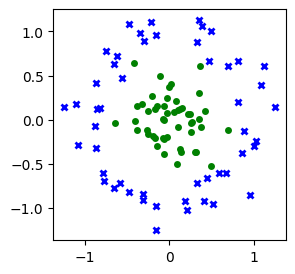

In [6]:
X, y = make_circles(n_samples=100, noise=0.15, factor=0.3, random_state=42)

plt.figure(figsize=(3, 3))
plt.plot(*X[y == 0].T, 'bx', markersize=4,  markeredgewidth=2)
plt.plot(*X[y == 1].T, 'g.', markersize=4,  markeredgewidth=3)

Train and compare SVC model with and without aggregation

In [7]:
# A base model fitting and evaluation.
base_model = SVC(kernel="rbf")
base_model.fit(X, y)
print("base model accuracy", accuracy_score(y, base_model.predict(X)))

# Applying the data aggregation algorithm.
# We need only a model for local patterns because the classification task.
local_model = KMeans(5, n_init=10)
aggregator = ClassificationAggregator(local_model=local_model)
X_agg, y_agg = aggregator.fit_transform(X, y)

# 'Aggregated' model fitting and evaluation.
agg_model = SVC(kernel="rbf")
agg_model.fit(X_agg, y_agg)

print("'aggregated' model accuracy", accuracy_score(y, agg_model.predict(X)))

base model accuracy 0.95
'aggregated' model accuracy 0.95


Results visualization in 2D

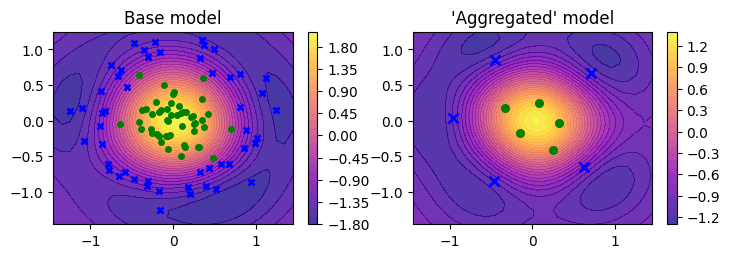

In [10]:
plt.figure(figsize=(8.5, 2.5))
# Draw the base model.
plt.subplot(1, 2, 1)
# Model's contour plot.
plot_hyperplane_2d(
    base_model.decision_function,
    (X[:, 0].min() - 0.2, X[:, 0].max() + 0.2), (X[:,1].min() - 0.2, X[:, 1].max() + 0.2), 0.1, 0.1
)
# Add points to plot.
plt.plot(*X[y == 0].T, 'bx', markersize=4,  markeredgewidth=2)
plt.plot(*X[y == 1].T, 'g.', markersize=4,  markeredgewidth=3)
plt.title("Base model")

# Draw the 'aggregated' model
plt.subplot(1, 2, 2)
# Model's contour plot
plot_hyperplane_2d(
    agg_model.decision_function,
    (X[:, 0].min() - 0.2, X[:, 0].max() + 0.2), (X[:,1].min() - 0.2, X[:, 1].max() + 0.2), 0.1, 0.1
)
# Add points to plot.
plt.plot(*X_agg[y_agg.flatten() == 0].T, 'bx', markersize=7,  markeredgewidth=2)
plt.plot(*X_agg[y_agg.flatten() == 1].T, 'g.', markersize=7,  markeredgewidth=3)
plt.title("'Aggregated' model")

plt.show()

Results visualization in 3D

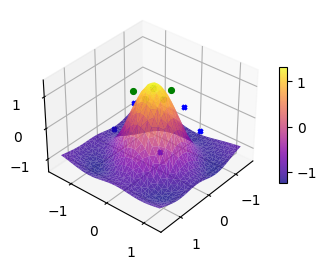

In [51]:
fig = plt.figure(figsize=(4, 3))
# Model's surface plot.
ax = plot_hyperplane_3d(
    agg_model.decision_function,
    (X[:, 0].min() - 0.2, X[:, 0].max() + 0.2),
    (X[:,1].min() - 0.2, X[:, 1].max() + 0.2),
    0.1, 0.1,
    fig,
    elev=35,
    azim=40
)
# Add points to plot.
ax.scatter(
    *X_agg[y_agg == 0].T, y_agg[y_agg == 0], depthshade=False,
    marker='x', c="b", s=10,  linewidth=2
)
ax.scatter(
    *X_agg[y_agg == 1].T, y_agg[y_agg == 1], depthshade=False,
    marker='o', c="g", s=10,  linewidth=2
)